In [1]:
import pandas as pd

train_features = pd.read_csv('data/train_features.csv', encoding='utf-8')
test_features = pd.read_csv('data/test_features.csv', encoding='utf-8')
train_labels = pd.read_csv('data/train_labels.csv', encoding='utf-8')
submission = pd.read_csv('data/sample_submission.csv', encoding='utf-8')

In [2]:
train_features

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [3]:
test_features.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912


In [4]:
# 데이터 합치기 (id를 기준으로)
train_df = pd.merge(train_features, train_labels, on='id')
train_df

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,37,Shoulder Press (dumbbell)
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,37,Shoulder Press (dumbbell)
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,37,Shoulder Press (dumbbell)
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,37,Shoulder Press (dumbbell)
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,37,Shoulder Press (dumbbell)
...,...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,2,Bicep Curl
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,2,Bicep Curl
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,2,Bicep Curl
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,2,Bicep Curl


In [5]:
train_labels['label'].unique()

array([37, 26,  3, 39, 28,  6, 60, 35, 34, 30, 59, 15, 40, 50, 48,  8, 54,
       16,  4, 58, 21, 18, 51, 25, 24, 17, 49, 47, 27, 36,  2, 38, 14, 10,
       55, 57,  0,  1, 46, 43, 52, 53,  5, 56, 23, 44, 42, 19, 32, 45, 29,
       31, 11,  7, 41, 12,  9, 20, 13, 22, 33], dtype=int64)

In [7]:
train_df['id'].value_counts()

2047    600
1347    600
2378    600
1354    600
2379    600
       ... 
1699    600
675     600
2722    600
1698    600
0       600
Name: id, Length: 3125, dtype: int64

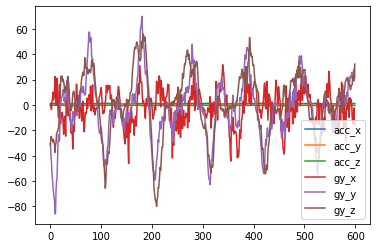

In [11]:
ex = train_features[train_features['id']==0]
ex.iloc[:,2:].plot()

In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [61]:
# import numpy as np
# X=tf.reshape(np.array(train_features.iloc[:,2:]),[-1, 600, 6])
# X.shape

# y = tf.keras.utils.to_categorical(train_labels['label']) 
# y.shape

In [62]:
X= np.array(train_features.iloc[:,2:]).reshape(3125, 600, 6)
X.shape

(3125, 600, 6)

In [63]:
y = np.array(pd.get_dummies(train_labels['label']))
y.shape

(3125, 61)

In [88]:
#가벼운 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 32)                4992      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_16 (Dense)             (None, 61)                671       
Total params: 11,177
Trainable params: 11,177
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.fit(X,y, epochs=20, batch_size=32, validation_split=0.2)

Train on 2500 samples, validate on 625 samples
Epoch 1/20
2500/2500 [==============================] - 17s 7ms/step - loss: 3.3538 - accuracy: 0.4436 - val_loss: 2.8280 - val_accuracy: 0.4976
Epoch 2/20
2500/2500 [==============================] - 19s 7ms/step - loss: 2.8130 - accuracy: 0.4828 - val_loss: 2.7268 - val_accuracy: 0.4976
Epoch 3/20
2500/2500 [==============================] - 20s 8ms/step - loss: 2.7324 - accuracy: 0.4828 - val_loss: 2.6969 - val_accuracy: 0.4976
Epoch 4/20
2500/2500 [==============================] - 19s 8ms/step - loss: 2.6844 - accuracy: 0.4828 - val_loss: 2.6590 - val_accuracy: 0.4976
Epoch 5/20
2500/2500 [==============================] - 19s 8ms/step - loss: 2.6347 - accuracy: 0.4828 - val_loss: 2.6307 - val_accuracy: 0.4976
Epoch 6/20
2500/2500 [==============================] - 33s 13ms/step - loss: 2.5787 - accuracy: 0.4828 - val_loss: 2.5890 - val_accuracy: 0.4976
Epoch 7/20
2500/2500 [==============================] - 23s 9ms/step - loss: 2.520

In [84]:
test_X= np.array(test_features.iloc[:,2:]).reshape(len(test_features['id'].unique()), 600, 6)
test_X.shape

prediction=model.predict(test_X)
prediction.shape


(782, 61)

In [85]:
submission.iloc[:,1:]=prediction
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,2.314131e-06,7.945396e-06,2.195774e-09,3.319853e-04,1.203318e-02,4.880327e-05,3.504747e-07,1.602858e-08,3.219438e-07,...,2.611573e-05,1.125106e-05,5.551755e-06,3.914791e-03,1.107226e-08,6.281889e-09,0.010037,1.072290e-05,4.708533e-06,5.976335e-04
1,3126,7.561080e-08,6.457329e-07,4.298915e-15,3.032710e-05,2.592115e-05,4.655858e-04,2.751335e-13,1.258385e-06,3.324679e-10,...,2.685006e-07,2.918490e-11,7.004582e-14,1.445440e-12,4.294810e-11,1.210429e-08,0.000144,4.189196e-11,2.654605e-07,1.238771e-07
2,3127,1.284482e-07,1.053493e-03,1.045611e-08,1.149777e-10,1.294423e-03,9.046632e-05,5.230025e-03,6.331113e-05,6.373012e-04,...,1.832510e-04,1.238567e-09,7.615129e-07,1.543671e-06,2.508636e-08,3.269735e-06,0.002439,3.131309e-04,4.128857e-06,4.058109e-04
3,3128,4.193921e-07,7.752192e-11,4.385038e-09,1.647709e-07,2.104896e-08,6.360854e-07,3.384460e-11,5.624886e-05,1.876184e-04,...,1.150157e-04,2.630654e-06,3.569828e-09,1.775413e-05,1.277923e-14,1.905415e-06,0.000026,1.757634e-07,4.607491e-07,7.346212e-03
4,3129,7.082043e-08,2.418296e-05,8.254227e-10,1.240919e-08,2.206702e-04,2.549378e-08,9.401450e-10,2.501491e-07,1.326939e-03,...,1.046357e-03,1.006321e-05,7.932317e-11,6.707523e-08,1.983246e-09,3.148708e-09,0.002315,2.449338e-08,5.339864e-05,1.303235e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,3.675498e-06,7.042296e-06,4.570301e-08,2.071980e-04,1.931359e-02,9.911057e-06,4.322795e-11,7.057557e-10,2.194629e-08,...,6.214686e-06,7.819234e-06,3.646112e-08,4.271029e-05,5.699064e-07,8.622268e-09,0.011205,4.558425e-09,2.621157e-04,3.002120e-06
778,3903,3.970764e-02,8.949512e-03,2.575005e-09,3.400780e-07,1.460646e-01,2.825406e-04,4.985105e-08,1.534892e-02,5.060765e-10,...,5.073572e-06,6.114446e-10,3.036594e-15,1.062986e-09,3.752569e-04,5.165215e-07,0.000496,1.000854e-05,2.224429e-02,1.033763e-06
779,3904,2.945538e-11,3.614367e-09,3.760476e-13,3.365025e-12,3.623705e-06,1.947779e-05,4.433244e-11,4.008805e-09,3.194604e-06,...,1.040894e-05,1.667038e-09,3.955638e-09,8.328140e-11,6.451879e-12,3.019360e-11,0.000120,1.068962e-04,6.700753e-14,7.027177e-07
780,3905,2.590779e-05,6.585642e-06,3.543325e-04,3.210809e-03,5.105656e-05,1.503352e-04,1.633557e-08,1.148638e-06,1.776874e-07,...,2.523034e-04,1.266439e-08,1.173744e-05,7.865482e-01,4.109776e-06,8.684343e-07,0.001616,8.753462e-06,1.516645e-02,1.018534e-05


In [87]:
from datetime import datetime 
submission.to_csv('result/submission+'+datetime.today().strftime("%Y%m%d%H%M%S") +'.csv', index=False)